# JSON info-arch

Testing the functionality to exchange information as JSON-like strings.

In [44]:
from interpml import config, utils
from interpml import info_architecture as ia
from interpml import plotting

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pprint import pprint

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# Defined by lists of (row1, col1, height, width) tuples

# 2-component dashboards
split = 8
spec1 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec2 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec3 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

split = 6
spec4 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

# 3-component dashboards
split = 6, 4
spec5 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 6
spec6 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 4
spec7 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec8 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec9 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 6, 4
spec10 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 4, 6
spec11 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

split = 6, 4
spec12 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

specs = [
    spec1, spec2, spec3, spec4, spec5, spec6,
    spec7, spec8, spec9, spec10, spec11, spec12
]

In [110]:
treemaps = []
info_archs = []
for i, arch in enumerate(specs):
    for j in range(3):
        arr = ia.spec2arr(arch, n_components=4, height=height, width=width)
        treemaps.append(arr)
        try:
            info_archs.append(ia.InfoArchTree.from_array(i * 20 + j, arr, height=height, width=width))
        except:
            pass

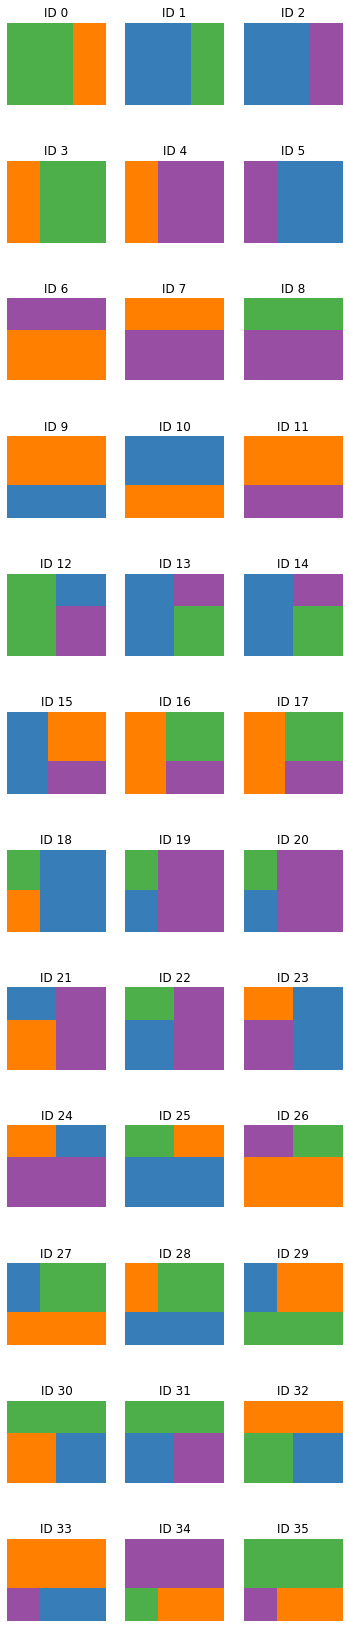

In [111]:
fig, axs = plt.subplots(len(specs), 3, figsize=(3 * 2, len(specs) * 2.5))
for i, (treemap, ax) in enumerate(zip(treemaps, axs.flat)):
    plotting.plot_treemap(treemap, ax=ax, vmin=0, vmax=9, cmap='Set1')
    ax.set_title(f'ID {i}')
    ax.axis('off')

In [118]:
jsondict = info_archs[19].to_json()
tree = ia.InfoArchTree.from_json(jsondict)

In [119]:
print(tree)

[], 1.00, v
|----[], 0.33, v
|    |----2.0, 0.50, h
|    |----[], 0.50, h
|    |    |----1.0, 1.00, h
|----3.0, 0.67, v


In [120]:
tree.root.right.orientation

'v'

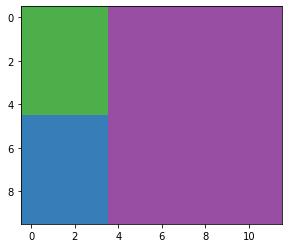

In [ ]:
plotting.plot_treemap(treemaps[19], vmin=0, vmax=9, cmap='Set1')

In [116]:
tree.height

12

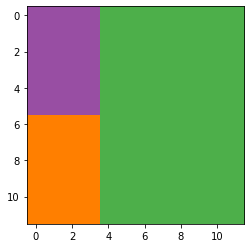

In [117]:
plotting.plot_treemap(tree.to_array(), vmin=0, vmax=9, cmap='Set1')

## Fixing `arr2tree` method

In [89]:
tree.to_array()

array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])

In [90]:
treemaps[19]

array([[3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4.],
       [1., 1., 1., 1., 4., 4., 4., 4., 4., 4., 4., 4.]])

In [98]:
ia._find_sep(treemaps[19], 1)

3

In [95]:
print(tree)

[], 1.00, v
|----[], 0.33, h
|    |----3.0, 0.50, h
|    |----[], 0.50, h
|    |    |----1.0, 1.00, h
|----4.0, 0.67, v


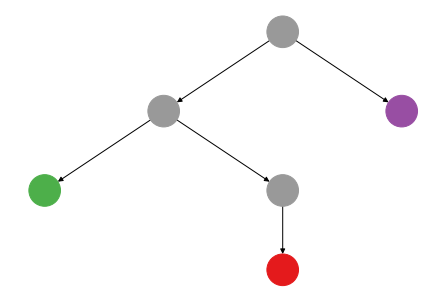

In [94]:
plotting.plot_tree_graph(tree)

## Manually

In [69]:
jsondict = {'components': {'height': 1,
                'id': -1,
                'left_child': {'height': 1,
                               'id': -1,
                               'left_child': {'height': 0.5,
                                              'id': 2.0,
                                              'left_child': {},
                                              'orientation': 'h',
                                              'right_child': {},
                                              'width': 1},
                               'orientation': 'v',
                               'right_child': {'height': 0.5,
                                               'id': -1,
                                               'left_child': {'height': 1.0,
                                                              'id': 1.0,
                                                              'left_child': {},
                                                              'orientation': 'h',
                                                              'right_child': {},
                                                              'width': 1},
                                               'orientation': 'h',
                                               'right_child': {},
                                               'width': 1},
                               'width': 0.3333333333333333},
                'orientation': 'v',
                'right_child': {'height': 1,
                                'id': 3.0,
                                'left_child': {},
                                'orientation': 'v',
                                'right_child': {},
                                'width': 0.6666666666666667},
                'width': 1.0},
 'height': 10,
 'id': 81,
 'width': 12}

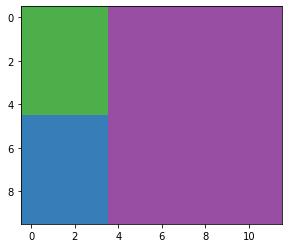

In [70]:
tree = ia.InfoArchTree.from_json(jsondict)
plotting.plot_treemap(tree.to_array(), vmin=0, vmax=9, cmap='Set1')

In [71]:
treemaps[9]

array([[2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.]])

In [72]:
tree.to_array()

array([[2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3.]])

In [73]:
print(tree)

[], 1.00, v
|----[], 0.33, v
|    |----2.0, 0.50, h
|    |----[], 0.50, h
|    |    |----1.0, 1.00, h
|----3.0, 0.67, v


## Saving info_archs